In [1]:
import experiment as me
import plot_utils
from qiskit import Aer
from tqdm import tqdm

import matplotlib.pyplot as plt

import generate_random_matrix as grm

# Parameters

In [2]:
method = ('COBYLA', {'rhobeg': 1.2,
                     'maxiter': 1000,
                     'disp': False,
                     'catol': 0.0002})

density = 0.4

backend_creator = lambda: Aer.get_backend('qasm_simulator')

# First section: Landscape plotting

In [3]:
hist_exp_dim=3

In [4]:
small_p_experiment = me.Experiment(p=1, dim=hist_exp_dim,
                                   method=method,
                                   create_backend=backend_creator)


model = small_p_experiment.generate_model(dens=density)


# Plotting routes and landscape for p=1
### For theta to be 2D

In [5]:
pathing = small_p_experiment.solve_and_record_pathing(model)

N = 20
exp_function = small_p_experiment.get_expectation_function(model)
landscape = plot_utils.compute_energy_landscape(exp_function, grid=(N, N))

final_theta, route_theta, route_function, final_function = pathing

## Landscape and points visited during optimization

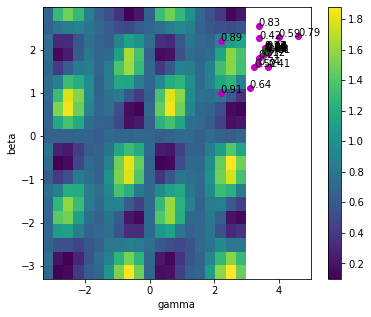

In [6]:
plot_utils.plot_energy_landscape(landscape, pathing)

## Energy value along the optimizer route

0.09092306415026766


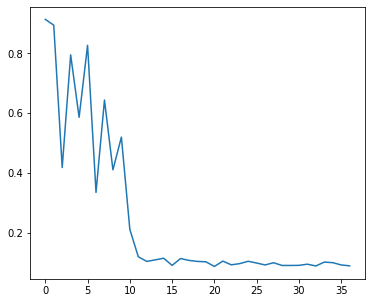

In [7]:
plot_utils.plot_energy_route(route_function, final_function)

## Plotting state historgram

{'101': 171, '000': 168, '010': 90, '100': 168, '110': 283, '001': 137, '011': 3, '111': 4}


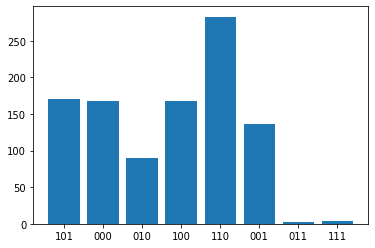

In [8]:
counts, _ = small_p_experiment.retrieve_state_distribution(model, final_theta)
plot_utils.analazing_the_result(counts)

## The brute force results for sanity check

In [9]:
print(small_p_experiment.brute_force(model))

{'000': 0.0, '001': 0.0, '010': 0.0, '011': 2.450866706216135, '100': 0.0, '101': 0.0, '110': 0.2998343271721178, '111': 2.7507010333882524}


# Plotting routes and landscape for p=4
### Theta will be 8-dim vector, so no landscape plotting

In [10]:
big_p_experiment = me.Experiment(p=4, dim=hist_exp_dim,
                                 method=method,
                                 create_backend=backend_creator
                                 )
#same model as in experiment with p = 1
pathing = big_p_experiment.solve_and_record_pathing(model)
final_theta, route_theta, route_function, final_function = pathing


## Energy value along the optimizer route

0.03886740014447203


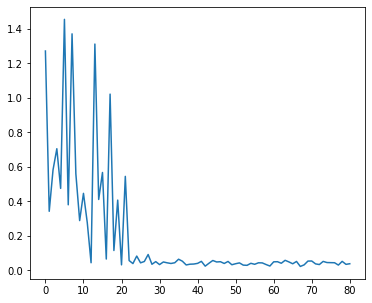

In [11]:
plot_utils.plot_energy_route(route_function, final_function)

## Plotting state histogram

{'000': 476, '100': 458, '101': 14, '110': 41, '001': 18, '011': 10, '111': 1, '010': 6}


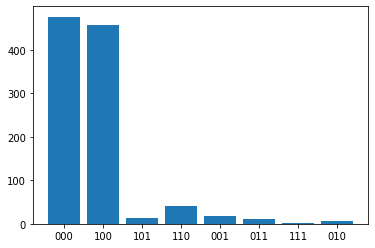

In [12]:

counts, _ = big_p_experiment.retrieve_state_distribution(model, final_theta)
plot_utils.analazing_the_result(counts)

# Brute force sanity check

In [13]:
print(big_p_experiment.brute_force(model))

{'000': 0.0, '001': 0.0, '010': 0.0, '011': 2.450866706216135, '100': 0.0, '101': 0.0, '110': 0.2998343271721178, '111': 2.7507010333882524}


# Second section: Probablity distributions

In [3]:
probability_exp_dim = 10
samples_number = 99

## Distributions for p = 1

In [15]:
first_distr_exp = me.Experiment(p=1,
                               dim=probability_exp_dim,
                               method=method,
                               create_backend=backend_creator)

models = [first_distr_exp.generate_model(dens=density)
          for _ in range(samples_number)]

models_and_brute_solutions = [
    (model, first_distr_exp.brute_force(model)) for model in tqdm(models)]

100%|██████████| 99/99 [00:12<00:00,  7.99it/s]


100%|██████████| 99/99 [03:19<00:00,  2.02s/it]


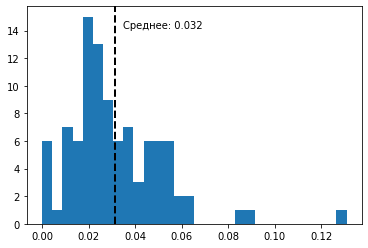

100%|██████████| 99/99 [02:08<00:00,  1.30s/it]


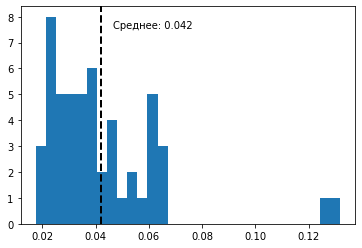

100%|██████████| 99/99 [01:00<00:00,  1.65it/s]


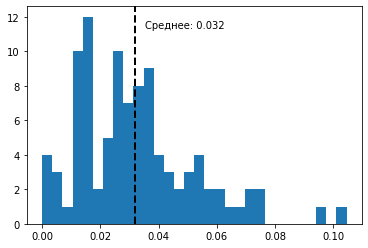

In [16]:
plot_utils.hist_with_avg(first_distr_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities1))# вероятность правильного ответа, двойные выкидываем
plot_utils.hist_with_avg(first_distr_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities2)) # вероятность правильного ответа при правильно решенной задаче
plot_utils.hist_with_avg(first_distr_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities3))# вероятность правильного ответа, двойные складываем


## Distributions for p = 2

100%|██████████| 99/99 [01:44<00:00,  1.06s/it]


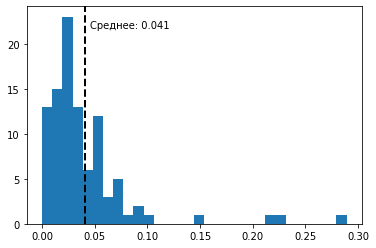

100%|██████████| 99/99 [01:46<00:00,  1.08s/it]


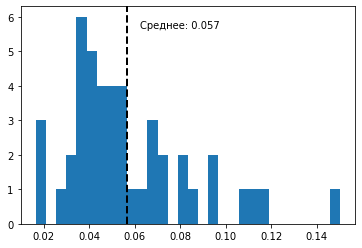

100%|██████████| 99/99 [01:48<00:00,  1.09s/it]


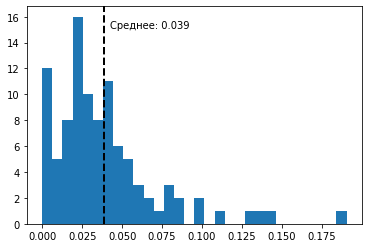

In [17]:
second_distr_exp = me.Experiment(p=2,
                         dim=probability_exp_dim,
                         method=method,
                         create_backend=backend_creator)

#with same samples

plot_utils.hist_with_avg(second_distr_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities1)) # вероятность правильного ответа, двойные выкидываем
plot_utils.hist_with_avg(second_distr_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities2)) # вероятность правильного ответа при правильно решенной задаче
plot_utils.hist_with_avg(second_distr_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities3)) # вероятность правильного ответа, двойные складываем

## Distributions for p = 3

100%|██████████| 99/99 [02:48<00:00,  1.70s/it]


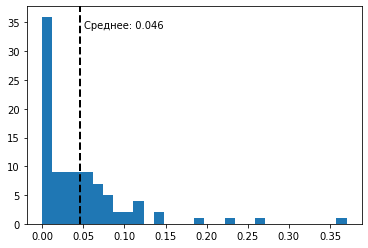

100%|██████████| 99/99 [02:48<00:00,  1.70s/it]


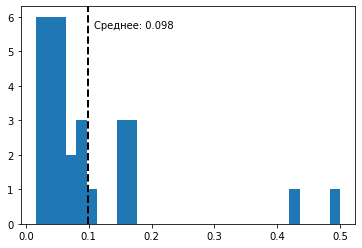

100%|██████████| 99/99 [03:15<00:00,  1.98s/it]


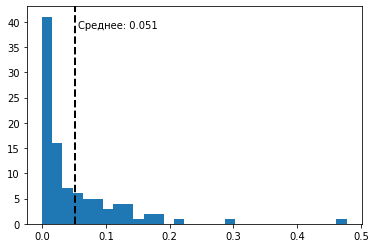

In [18]:
third_distr_exp = me.Experiment(p=3,
                               dim=probability_exp_dim,
                               method=method,
                               create_backend=backend_creator)

# with same samples

plot_utils.hist_with_avg(third_distr_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities1)) # вероятность правильного ответа, двойные выкидываем
plot_utils.hist_with_avg(third_distr_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities2)) # вероятность правильного ответа при правильно решенной задаче
plot_utils.hist_with_avg(third_distr_exp.compute_probability_distribution(
    models_and_brute_solutions,
    me.retrieve_probabilities3)) # вероятность правильного ответа, двойные складываем


# Average probabilities

In [32]:
def compute_avg_probs(p):
    experiment = me.Experiment(p=p,
                               dim=probability_exp_dim,
                               method=method,
                               create_backend=backend_creator)
    return experiment.compute_probability_avg(models_and_brute_solutions,
                                              me.retrieve_probabilities1)

100%|██████████| 99/99 [06:27<00:00,  3.91s/it]


<BarContainer object of 4 artists>

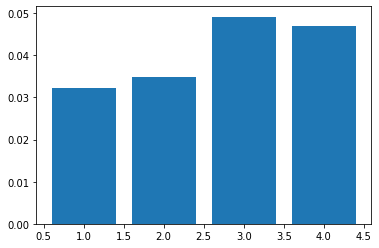

In [20]:
rng = list(range(1, 5))
a = [compute_avg_probs(p=i) for i in rng]
plt.bar(rng, a)

In [5]:
def models_and_compute_avg_probs(p, dim):
    experiment = me.Experiment(p=p,
                               dim=dim,
                               method=method,
                               create_backend=backend_creator)
    # print("one")
    models = [experiment.generate_model(dens=density)
          for _ in range(20)]
    # print("two")
    models_and_brute_solutions = [
        (model, experiment.brute_force(model)) for model in tqdm(models)]
    # print("three")
    return experiment.compute_probability_avg(models_and_brute_solutions,
                                              me.retrieve_probabilities1)

rng = list(range(3, 20))
a = [models_and_compute_avg_probs(p=2, dim=i) for i in rng]
# plt.bar(rng, a)

100%|██████████| 20/20 [05:06<00:00, 15.34s/it]


<BarContainer object of 17 artists>

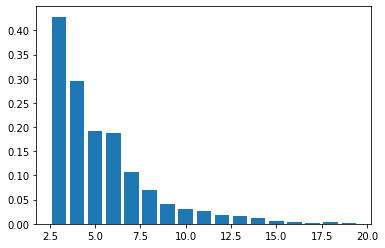

In [6]:
plt.bar(rng, a)

# Third section: accuracy per circut depth

In [9]:
accuracy_exp_dim = 9
samples_number = 20

experiment = me.Experiment(p=1,
                            dim=accuracy_exp_dim,
                            method=method,
                            create_backend=backend_creator)

models = [experiment.generate_model(dens=density)
        for _ in range(samples_number)]
models_and_brute_solutions = [
    (model, experiment.brute_force(model)) for model in tqdm(models)]


100%|██████████| 20/20 [00:00<00:00, 47.39it/s]


In [11]:
def count_solved_fraction(p):
    experiment = me.Experiment(p=p,
                               dim=accuracy_exp_dim,
                               method=method,
                               create_backend=backend_creator)
    cnt = 0
    for model, brute_solution in tqdm(models_and_brute_solutions):
        solution = experiment.solve(model)
        final_theta = solution.x
        counts, (item, score) = experiment.retrieve_state_distribution(model, final_theta)
        if experiment.validate(item, brute_solution):
            cnt += 1

    return cnt/samples_number

100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


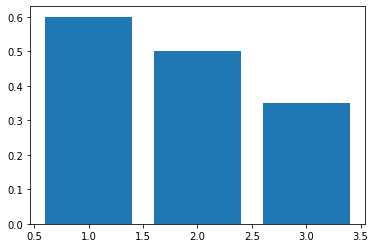

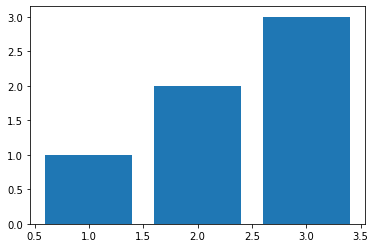

In [12]:
rng = list(range(1,4))
a = [count_solved_fraction(p=i) for i in rng]

plt.bar(rng, a)
plt.show()

import math
P = 0.8
plt.bar(rng, [math.ceil(math.log(1 - P, 1 - aa) - 1) for aa in a])
plt.show()

In [7]:
def models_and_count_solved_fraction(p, dim):
    experiment = me.Experiment(p=p,
                               dim=dim,
                               method=method,
                               create_backend=backend_creator)
    models = [experiment.generate_model(dens=density)
          for _ in range(samples_number)]
    models_and_brute_solutions = [
        (model, experiment.brute_force(model)) for model in tqdm(models)]
    cnt = 0
    for model, brute_solution in models_and_brute_solutions:
        solution = experiment.solve(model)
        final_theta = solution.x
        counts, (item, score) = experiment.retrieve_state_distribution(model, final_theta)
        if experiment.validate(item, brute_solution):
            cnt += 1

    return cnt/samples_number

100%|██████████| 20/20 [00:24<00:00,  1.22s/it]


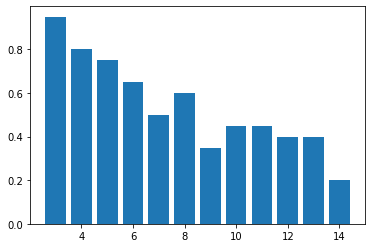

<BarContainer object of 12 artists>

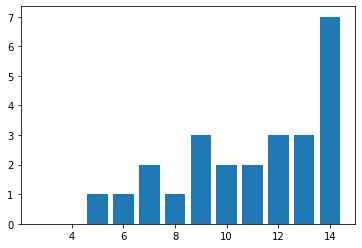

In [14]:
rng = list(range(3, 15))
a = [models_and_count_solved_fraction(p=1, dim=i) for i in rng]

plt.bar(rng, a)
plt.show()

import math
P = 0.8
plt.bar(rng, [max(0, math.ceil(math.log(1 - P, 1 - aa) - 1)) for aa in a])

# Forth section: behaviour on close matricies

In [3]:
neight_exp_dim = 3

neigh_experiment = me.Experiment(p=1,
                                 dim=neight_exp_dim,
                                 method=method,
                                 create_backend=backend_creator)
N = 200

center_matrix = grm.random_normal_matrix(neight_exp_dim, dens=density)
center_model = grm.model_from_sparse_matrix(center_matrix)
center_theta = neigh_experiment.solve(center_model).x
_, (item, _) = neigh_experiment.retrieve_state_distribution(center_model,
                                                            center_theta)
brute_solution = neigh_experiment.brute_force(center_model)

assert neigh_experiment.validate(item, brute_solution), "should be a solution"

In [6]:
def solve_on_neighbourhood(step):
    from scipy.spatial import distance as spd
    neigh_samples = neigh_experiment.generate_close_matricies(N, center_matrix,
                                                              step, dens=density)

    solved, thetas, matricies = [], [], []

    for matrix in tqdm(neigh_samples):
        model = grm.model_from_sparse_matrix(matrix)
        final_theta = neigh_experiment.solve(model).x
        distr = neigh_experiment.retrieve_state_distribution(model,
                                                             final_theta)
        _, (item, _) = distr
        brute_solution = neigh_experiment.brute_force(model)
        if not neigh_experiment.validate(item, brute_solution):
            continue

        

        dist_in_theta_space = spd.euclidean(center_theta, final_theta)
        dist_in_matrix_space = spd.euclidean(center_matrix.A.flatten(),
                                             matrix.A.flatten())

        thetas.append(final_theta)
        matricies.append(matrix)
        solved.append((dist_in_theta_space, dist_in_matrix_space))
        
    return solved, (thetas, matricies)


# Step is 0.1

100%|██████████| 200/200 [00:24<00:00,  8.29it/s]


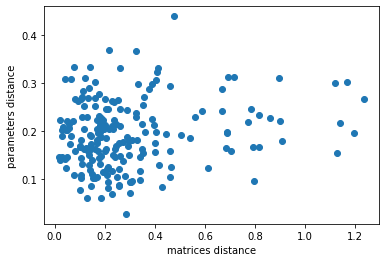

In [7]:
distances, _ = solve_on_neighbourhood(step=0.1)
xs = [dist[0] for dist in distances]
ys = [dist[1] for dist in distances]

plt.scatter(xs, ys)
plt.xlabel('matrices distance')
plt.ylabel('parameters distance')
plt.show()

# Step is 0.01

100%|██████████| 200/200 [00:27<00:00,  7.17it/s]


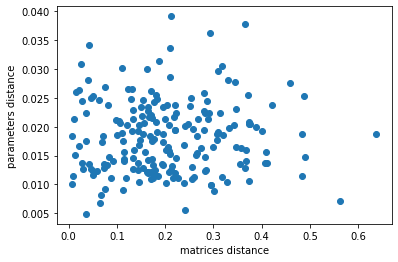

In [8]:
distances, _ = solve_on_neighbourhood(step=0.01)
xs = [dist[0] for dist in distances]
ys = [dist[1] for dist in distances]

plt.scatter(xs, ys)
plt.xlabel('matrices distance')
plt.ylabel('parameters distance')
plt.show()

# Step is 0.001

100%|██████████| 200/200 [00:29<00:00,  6.78it/s]


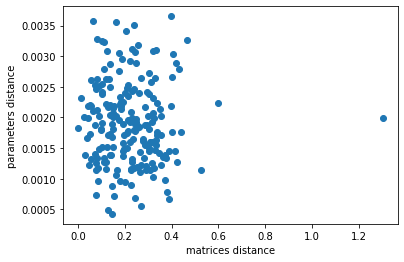

In [9]:
distances, _ = solve_on_neighbourhood(step=0.001)
xs = [dist[0] for dist in distances]
ys = [dist[1] for dist in distances]

plt.scatter(xs, ys)
plt.xlabel('matrices distance')
plt.ylabel('parameters distance')
plt.show()

# With landscape plot

In [10]:
expectation_function = neigh_experiment.get_expectation_function(center_model)
landscape = plot_utils.compute_energy_landscape(expectation_function, grid=(40, 40))

distances, (thetas, _) = solve_on_neighbourhood(step=0.01)

100%|██████████| 200/200 [00:25<00:00,  7.89it/s]


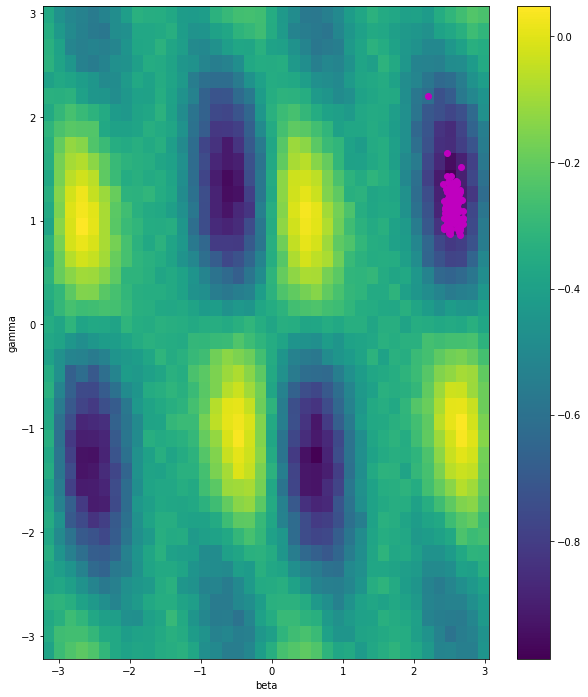

In [11]:
fig, ax = plt.subplots()
c = ax.pcolormesh(*landscape)
[ax.plot(*theta, 'mo') for theta in thetas]
fig.colorbar(c, ax=ax)

fig.set_size_inches(10, 12, forward=True)
ax.set_xlabel('beta')
ax.set_ylabel('gamma')
plt.show()